<a href="https://colab.research.google.com/github/lourdesvaca/repository-algoritmica-avanzada-2023-2/blob/algoritmica-avanzada/AA_Practica_pre_parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Repaso

Parcial 2, Algoritmica Avanzada. 2023-2


In [37]:
#libreria para el entrenamiento del modelo
from sklearn.model_selection import train_test_split
#libreria para el modelo: kneighbors
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#libreria para el modelo: decisionTree
from sklearn.tree import DecisionTreeClassifier

#libreria para el modelo: random forest
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [4]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [5]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
10122                0.857                  0.462   
10123                0.683                  0.511   
10124                0.818                  0.000   
10125                0.722                  0.000   
10126                0.649                  0.189   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
10122                                           0.000191                                                                                    
10123                                           0.995270                                                                                    
10124                                           0.997880                                                                                    
10125                                           0.996710                                                                                    
10126                                           0.996620                                                                                    

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
10122                                           0.999810                                                                                   
10123                                           0.004729                                                                                   
10124                                           0.002118                                                                                   
10125                                           0.003294                                                                                   
10126                                           0.003377                                                                                   

[5 rows x 23 columns]

In [6]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [7]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [45]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [46]:
df['Income_Category'] = df.Income_Category.map({'$60K - $80K':1, 'Less than $40K':2, '$80K - $120K':3, '$40K - $60K':4,'$120K +':5, 'Unknown':6})

In [8]:
df.Gender.unique()

array(['M', 'F'], dtype=object)

In [9]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [10]:
df.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [13]:
df.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

Eliminamos las últimas dos columnas

In [14]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

Mapeamos las columnas categóricas que contiene el dataset

In [15]:
#forma 1
df['Attrition_Flag'] = df.Attrition_Flag.map({'Existing Customer': 1, 'Attrited Customer': 2})

In [16]:
#forma 2
df.Gender = df.Gender.map({'M': 1, 'F':2})

In [17]:
df.Education_Level = df.Education_Level.map({'High School':1 , 'Graduate':2, 'Uneducated':3, 'Unknown':4, 'College':5,'Post-Graduate':6, 'Doctorate':7})

In [18]:
df['Marital_Status'] = df.Marital_Status.map({'Married':1, 'Single':2, 'Unknown':3, 'Divorced':4})

In [19]:
df.Card_Category = df.Card_Category.map({'Blue':1, 'Gold':2, 'Silver':3, 'Platinum':4})

In [47]:
df.describe()

CLIENTNUM  Attrition_Flag  Customer_Age        Gender  \
count  1.012700e+04    10127.000000  10127.000000  10127.000000   
mean   7.391776e+08        1.160660     46.325960      1.529081   
std    3.690378e+07        0.367235      8.016814      0.499178   
min    7.080821e+08        1.000000     26.000000      1.000000   
25%    7.130368e+08        1.000000     41.000000      1.000000   
50%    7.179264e+08        1.000000     46.000000      2.000000   
75%    7.731435e+08        1.000000     52.000000      2.000000   
max    8.283431e+08        2.000000     73.000000      2.000000   

       Dependent_count  Education_Level  Marital_Status  Income_Category  \
count     10127.000000     10127.000000    10127.000000     10127.000000   
mean          2.346203         2.974622        1.758862         3.021230   
std           1.298908         1.680730        0.879864         1.535363   
min           0.000000         1.000000        1.000000         1.000000   
25%           1.000000         2.000000        1.000000         2.000000   
50%           2.000000         2.000000        2.000000         3.000000   
75%           3.000000         4.000000        2.000000         4.000000   
max           5.000000         7.000000        4.000000         6.000000   

       Card_Category  Months_on_book  ...  Months_Inactive_12_mon  \
count   10127.000000    10127.000000  ...            10127.000000   
mean        1.126987       35.928409  ...                2.341167   
std         0.482019        7.986416  ...                1.010622   
min         1.000000       13.000000  ...                0.000000   
25%         1.000000       31.000000  ...                2.000000   
50%         1.000000       36.000000  ...                2.000000   
75%         1.000000       40.000000  ...                3.000000   
max         4.000000       56.000000  ...                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000  

[8 rows x 21 columns]

In [21]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category              object
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Eliminamos las tablas que vemos necesarias

In [48]:
data = df.drop(['CLIENTNUM'], axis=1)

In [49]:
data.describe()

Attrition_Flag  Customer_Age        Gender  Dependent_count  \
count    10127.000000  10127.000000  10127.000000     10127.000000   
mean         1.160660     46.325960      1.529081         2.346203   
std          0.367235      8.016814      0.499178         1.298908   
min          1.000000     26.000000      1.000000         0.000000   
25%          1.000000     41.000000      1.000000         1.000000   
50%          1.000000     46.000000      2.000000         2.000000   
75%          1.000000     52.000000      2.000000         3.000000   
max          2.000000     73.000000      2.000000         5.000000   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
count     10127.000000    10127.000000     10127.000000   10127.000000   
mean          2.974622        1.758862         3.021230       1.126987   
std           1.680730        0.879864         1.535363       0.482019   
min           1.000000        1.000000         1.000000       1.000000   
25%           2.000000        1.000000         2.000000       1.000000   
50%           2.000000        2.000000         3.000000       1.000000   
75%           4.000000        2.000000         4.000000       1.000000   
max           7.000000        4.000000         6.000000       4.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count    10127.000000              10127.000000            10127.000000   
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.000000   
25%         31.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

###Tabla de correlación

Hacemos uso de esta tabla para identificar la relación entre columna y columna

In [50]:
corr = round(data.corr(), 4)
corr.style.background_gradient()

Separamos la data

data_x

data_Y

In [51]:
data_x = data.drop(['Attrition_Flag'], axis='columns') #aqui guardo todas las columnas con las que voy a entrenar al modelo
data_y = data.Attrition_Flag #aqui va el nombre de la columna objetivo

In [52]:
data_x

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0                45       1                3                1               1   
1                49       2                5                2               2   
2                51       1                3                2               1   
3                40       2                4                1               3   
4                40       1                3                3               1   
...             ...     ...              ...              ...             ...   
10122            50       1                2                2               2   
10123            41       1                2                4               4   
10124            44       2                1                1               1   
10125            30       1                2                2               3   
10126            43       2                2                2               1   

       Income_Category  Card_Category  Months_on_book  \
0                    1              1              39   
1                    2              1              44   
2                    3              1              36   
3                    2              1              34   
4                    1              1              21   
...                ...            ...             ...   
10122                4              1              40   
10123                4              1              25   
10124                2              1              36   
10125                4              1              36   
10126                2              3              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0   

In [53]:
data_y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    2
10124    2
10125    2
10126    2
Name: Attrition_Flag, Length: 10127, dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [55]:
data.info

<bound method DataFrame.info of        Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   1            45       1                3                1   
1                   1            49       2                5                2   
2                   1            51       1                3                2   
3                   1            40       2                4                1   
4                   1            40       1                3                3   
...               ...           ...     ...              ...              ...   
10122               1            50       1                2                2   
10123               2            41       1                2                4   
10124               2            44       2                1                1   
10125               2            30       1                2                2   
10126               2            43       2                2                2

In [56]:
data.shape

(10127, 20)

###Creamos los modelos de clasificatorios

In [57]:
model_neighbors = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()

In [58]:
#esto nos sirve para el modelo de "kneighbors" y "decisionTree"
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size= 0.1)

In [59]:
#entreno el modelo "kneighbors"
model_neighbors.fit(train_x, train_y)

KNeighborsClassifier()

In [60]:
#entreno el modelo "decision tree"
model_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [63]:
#entreno el modelo "random forest"
model_forest.fit(train_x, train_y)

RandomForestClassifier()

In [61]:
y_predicted_neighbors = model_neighbors.predict(test_x)

In [62]:
y_predicted_tree = model_tree.predict(test_x)

###Mostramos el porcentaje obtenido por cada modelo

In [67]:
print(f'Score modelo 1: {round(model_neighbors.score(test_x, test_y), 4) * 100}%')
print(f'Score modelo 2: {round(model_tree.score(test_x, test_y), 4) * 100}%')
print(f'Score  modelo 3: {round(model_forest.score(test_x, test_y), 4) * 100}%')

Score modelo 1: 89.14%
Score modelo 2: 94.77%
Score  modelo 3: 95.76%


###Veremos las gráficas

Decission Tree

In [64]:
from sklearn import tree

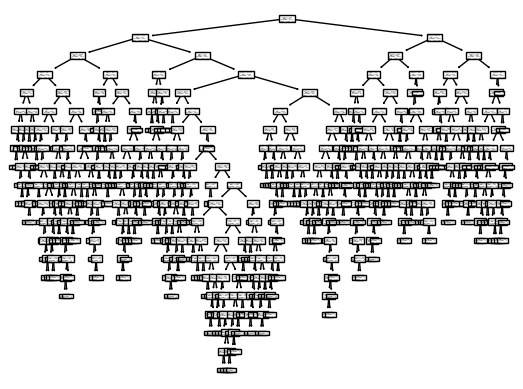

In [65]:
tree.plot_tree(model_tree)
plt.show()

Random forest

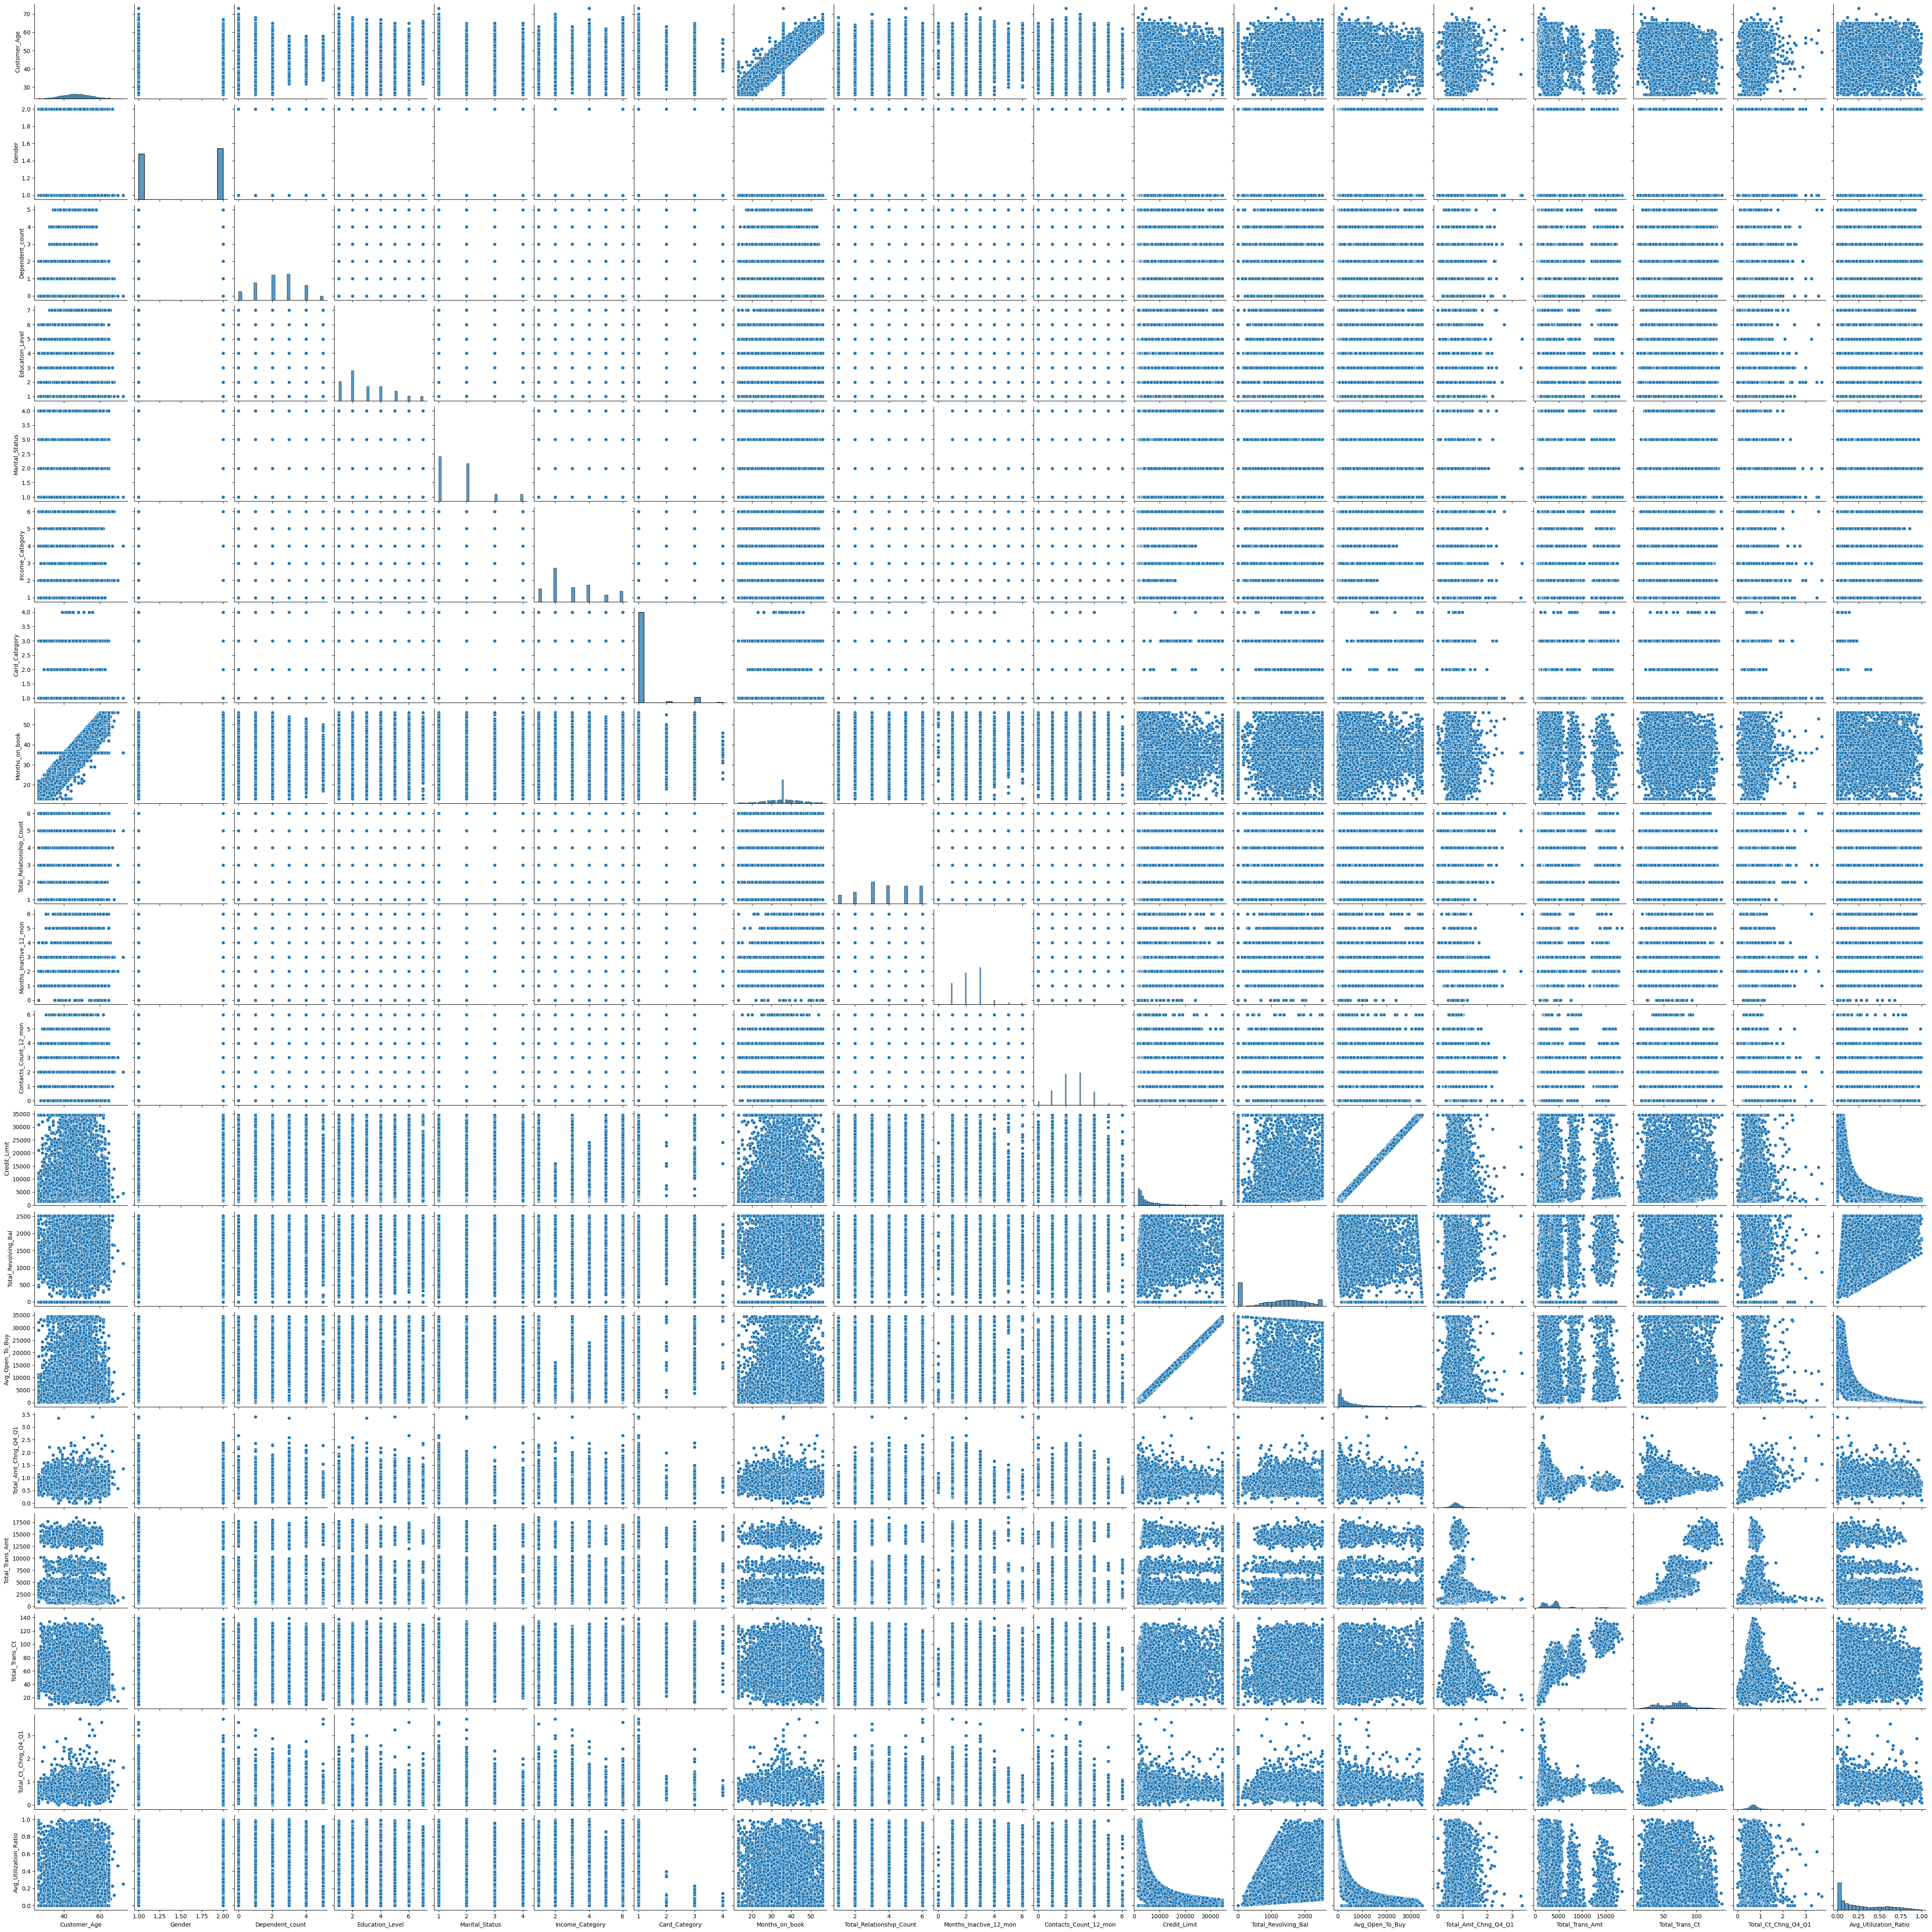

In [66]:
sns.pairplot(data_x)

###Humanizamos la salida

In [ ]:
#creamos la función
